# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) #split 90% train 10% test

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

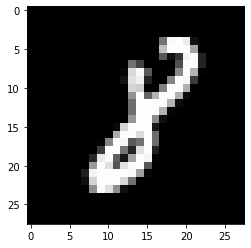

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(np.reshape(X_train[334,:],(28,28)), cmap='gray') #need to reshape 1D vector to 2D

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [19]:
#define models
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

bayes=GaussianNB()
linear=linear_model.SGDClassifier(loss='log', max_iter=50) #limit number of iterations -> linear model will not converge
rf=RandomForestClassifier()

#now train all

In [20]:
%%time
bayes.fit(X_train,y_train)

CPU times: user 468 ms, sys: 176 ms, total: 644 ms
Wall time: 644 ms


GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
%%time
linear.fit(X_train,y_train)

CPU times: user 38.7 s, sys: 0 ns, total: 38.7 s
Wall time: 38.7 s


/home/keuper/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=50,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
%%time
rf.fit(X_train,y_train)

CPU times: user 36.1 s, sys: 87.9 ms, total: 36.2 s
Wall time: 36.2 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
#train error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [28]:
%%time
#Bayes
accuracy_score(y_train,bayes.predict(X_train))

CPU times: user 1.57 s, sys: 448 ms, total: 2.02 s
Wall time: 2.02 s


0.5673174603174603

In [30]:
confusion_matrix(y_train,bayes.predict(X_train))

array([[5445,   10,   36,   14,   12,   18,  230,    6,  322,  108],
       [   3, 6739,   18,   27,    3,   13,   79,    2,  169,   67],
       [ 418,  175, 2088,  363,   27,   50, 1542,   16, 1488,   85],
       [ 263,  339,   60, 2241,   11,   29,  343,   48, 2460,  613],
       [ 122,   49,   55,   31,  992,   50,  605,   26, 1328, 2893],
       [ 494,  154,   33,  124,   32,  471,  329,   15, 3466,  552],
       [  45,   98,   30,    2,    5,   29, 5853,    0,  130,    7],
       [  26,   55,   12,   55,   45,    4,   20, 1992,  236, 4129],
       [  85,  791,   32,   49,   21,   50,  103,   10, 3993, 1012],
       [  31,   44,   16,   12,   37,    5,    4,   87,  117, 5927]])

In [26]:
%%time
#Linear
accuracy_score(y_train,linear.predict(X_train))

CPU times: user 273 ms, sys: 3.92 ms, total: 277 ms
Wall time: 121 ms


0.8806349206349207

In [31]:
confusion_matrix(y_train,linear.predict(X_train))

array([[6012,    1,   16,   23,   12,    7,   49,    3,   39,   39],
       [   3, 6759,   41,   16,   15,    5,    4,    4,  239,   34],
       [  29,   27, 5391,  128,  117,    9,   32,   43,  417,   59],
       [  24,   10,  150, 5567,   30,  124,   20,   17,  280,  185],
       [   8,   10,   17,    5, 5392,    1,   18,    3,   72,  625],
       [  54,   20,   73,  247,  174, 4113,  112,    4,  558,  315],
       [  29,   26,   90,    3,  105,   48, 5799,    5,   75,   19],
       [  14,   16,   66,   46,  155,    6,    3, 5164,  109,  995],
       [  46,   58,   58,  114,   76,   77,   17,    7, 5401,  292],
       [  20,   10,   14,   32,  183,    6,    3,   30,  100, 5882]])

In [27]:
%%time
#random Forest
accuracy_score(y_train,rf.predict(X_train))

CPU times: user 2.57 s, sys: 16 ms, total: 2.59 s
Wall time: 2.59 s


1.0

In [32]:
confusion_matrix(y_train,rf.predict(X_train))

array([[6201,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 7120,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6252,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6407,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6151,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 5670,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6199,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6574,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6146,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6280]])

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [37]:
from sklearn.metrics import f1_score
bayes_train_acc=accuracy_score(y_train,bayes.predict(X_train))
bayes_test_acc=accuracy_score(y_test,bayes.predict(X_test))
bayes_test_f1=f1_score(y_test,bayes.predict(X_test),average='micro') #f1 ins a binary measure, we need to average it over all classesd

In [38]:
linear_train_acc=accuracy_score(y_train,linear.predict(X_train))
linear_test_acc=accuracy_score(y_test,linear.predict(X_test))
linear_test_f1=f1_score(y_test,linear.predict(X_test),average='micro')

In [39]:
rf_train_acc=accuracy_score(y_train,rf.predict(X_train))
rf_test_acc=accuracy_score(y_test,rf.predict(X_test))
rf_test_f1=f1_score(y_test,rf.predict(X_test),average='micro')

In [81]:
rf_test_acc

0.967

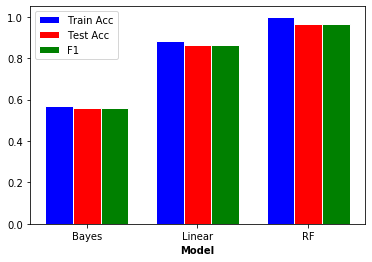

In [48]:
import matplotlib.pyplot as plt
train_acc=[bayes_train_acc,linear_train_acc,rf_train_acc]
test_acc=[bayes_test_acc,linear_test_acc,rf_test_acc]
test_f1=[bayes_test_f1,linear_test_f1,rf_test_f1]

# Set position of bar on X axis
barWidth = 0.25
r1 = np.arange(len(train_acc))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, train_acc, color='blue', width=barWidth, edgecolor='white', label='Train Acc')
plt.bar(r2, test_acc, color='red', width=barWidth, edgecolor='white', label='Test Acc')
plt.bar(r3, test_f1, color='green', width=barWidth, edgecolor='white', label='F1')

# Add xticks on the middle of the group bars
plt.xlabel('Model', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(train_acc))], ['Bayes', 'Linear', 'RF'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [77]:
#ROC
from sklearn.metrics import roc_auc_score,  roc_curve, auc

#get the 5
y_five = y_test=='5' #get bool lables=='5' - NOTE original lables are strings!
bayes_five = bayes.predict(X_test).astype(int)==5 #get bool for predictions - cast to int because predictions are uint
linear_five = linear.predict(X_test).astype(int)==5
rf_five = rf.predict(X_test).astype(int)==5

bayes_fpr, bayes_tpr, _ = roc_curve(y_five, bayes_five)
bayes_roc_auc = auc(bayes_fpr, bayes_tpr)
linear_fpr, linear_tpr, _ = roc_curve(y_five, linear_five)
linear_roc_auc = auc(linear_fpr, linear_tpr)
rf_fpr, rf_tpr, _ = roc_curve(y_five, rf_five)
rf_roc_auc = auc(rf_fpr, rf_tpr)

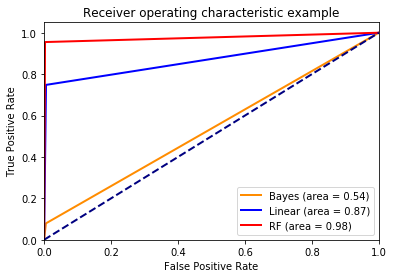

In [78]:
lw = 2
plt.plot(bayes_fpr, bayes_tpr, color='darkorange',
         lw=lw, label='Bayes (area = %0.2f)' % bayes_roc_auc)
plt.plot(linear_fpr, linear_tpr, color='blue',
         lw=lw, label='Linear (area = %0.2f)' % linear_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=lw, label='RF (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
